# **EJERCICIOS**

## **Complete el código del siguiente repositorio:**

In [2]:
import sympy as sym
from IPython.display import display


# ###################################################################
def cubic_spline(xs: list[float], ys: list[float]) -> list[sym.Symbol]:
    """
    Cubic spline interpolation ``S``. Every two points are interpolated by a cubic polynomial
    ``S_j`` of the form ``S_j(x) = a_j + b_j(x - x_j) + c_j(x - x_j)^2 + d_j(x - x_j)^3.``

    xs must be different  but not necessarily ordered nor equally spaced.

    ## Parameters
    - xs, ys: points to be interpolated

    ## Return
    - List of symbolic expressions for the cubic spline interpolation.
    """

    points = sorted(zip(xs, ys), key=lambda x: x[0])  # sort points by x

    xs = [x for x, _ in points]
    ys = [y for _, y in points]

    n = len(points) - 1  # number of splines

    h = [xs[i + 1] - xs[i] for i in range(n)]  # distances between  contiguous xs

    alpha = [0] * (n + 1)  # coefficients for the tridiagonal system
    for i in range(1, n):
        alpha[i] = 3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1])

    l = [1]
    u = [0]
    z = [0]

    for i in range(1, n):
        l += [2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1]]
        u += [h[i] / l[i]]
        z += [(alpha[i]-h[i-1]*z[i-1])/l[i]]

    l.append(1)
    z.append(0)
    c = [0] * (n + 1)

    x = sym.Symbol("x")
    splines = []
    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b = (ys[j + 1] - ys[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d = (c[j + 1] - c[j]) / (3 * h[j])
        a = ys[j]

        print(j, a, b, c[j], d)
        S= a + b * (x - xs[j]) + c[j] * (x - xs[j])**2 + d * (x - xs[j])**3
        splines.append(S)
    splines.reverse()
    return splines

## **Compruebe gráficamente la solución de los siguientes ejercicios:**

1. $$(0, 1), (1, 5), (2, 3)$$

1 5 1.0 -4.5 1.5
0 1 5.5 0.0 -1.5


-1.5*x**3 + 5.5*x + 1

1.0*x + 1.5*(x - 1)**3 - 4.5*(x - 1)**2 + 4.0

______


-1.5*x**3 + 5.5*x + 1

1.5*x**3 - 9.0*x**2 + 14.5*x - 2.0

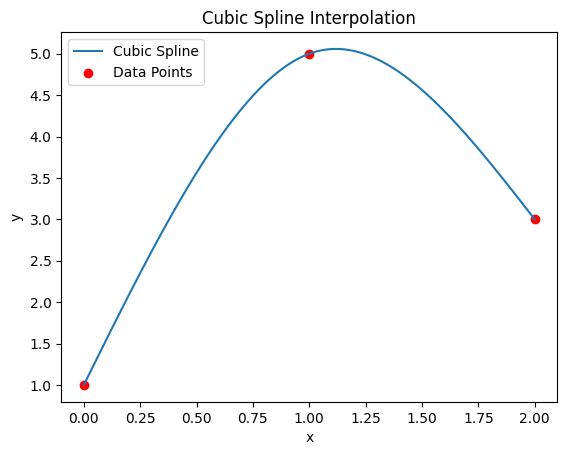

In [3]:
import numpy as np

xs = [0, 1, 2]
ys = [1, 5, 3]

splines = cubic_spline(xs=xs, ys=ys)
_ = [display(s) for s in splines]
print("______")
_ = [display(s.expand()) for s in splines]

import matplotlib.pyplot as plt

x_vals = np.linspace(min(xs), max(xs), 200)
y_vals = np.zeros_like(x_vals)

for i, S in enumerate(splines):
    # Each spline is valid in [xs[i], xs[i+1]]
    mask = (x_vals >= xs[i]) & (x_vals <= xs[i+1])
    y_vals[mask] = [float(S.subs('x', x)) for x in x_vals[mask]]

plt.plot(x_vals, y_vals, label='Cubic Spline')
plt.scatter(xs, ys, color='red', label='Data Points')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic Spline Interpolation')
plt.show()


2. $$(0, -5), (1, -4), (2, 3)$$

1 -4 4.0 4.5 -1.5
0 -5 -0.5 0.0 1.5


1.5*x**3 - 0.5*x - 5

4.0*x - 1.5*(x - 1)**3 + 4.5*(x - 1)**2 - 8.0

______


1.5*x**3 - 0.5*x - 5

-1.5*x**3 + 9.0*x**2 - 9.5*x - 2.0

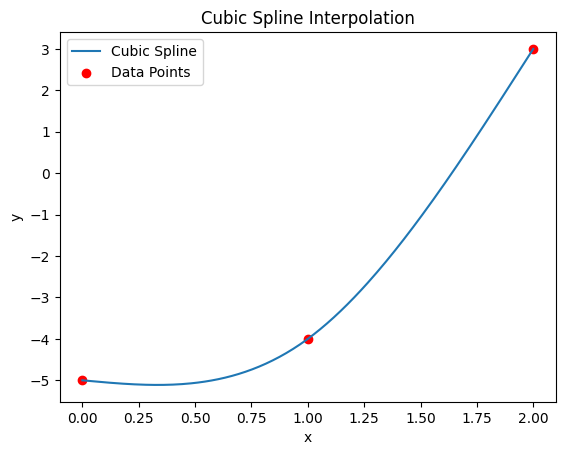

In [4]:
import numpy as np

xs = [0, 1, 2]
ys = [-5, -4, 3]

splines = cubic_spline(xs=xs, ys=ys)
_ = [display(s) for s in splines]
print("______")
_ = [display(s.expand()) for s in splines]

import matplotlib.pyplot as plt

x_vals = np.linspace(min(xs), max(xs), 200)
y_vals = np.zeros_like(x_vals)

for i, S in enumerate(splines):
    # Each spline is valid in [xs[i], xs[i+1]]
    mask = (x_vals >= xs[i]) & (x_vals <= xs[i+1])
    y_vals[mask] = [float(S.subs('x', x)) for x in x_vals[mask]]

plt.plot(x_vals, y_vals, label='Cubic Spline')
plt.scatter(xs, ys, color='red', label='Data Points')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic Spline Interpolation')
plt.show()


3. $$(0, -1), (1, 1), (2, 5), (3, 2)$$


2 5 1.0 -6.0 2.0
1 1 4.0 3.0 -3.0
0 -1 1.0 0.0 1.0


1.0*x**3 + 1.0*x - 1

4.0*x - 3.0*(x - 1)**3 + 3.0*(x - 1)**2 - 3.0

1.0*x + 2.0*(x - 2)**3 - 6.0*(x - 2)**2 + 3.0

______


1.0*x**3 + 1.0*x - 1

-3.0*x**3 + 12.0*x**2 - 11.0*x + 3.0

2.0*x**3 - 18.0*x**2 + 49.0*x - 37.0

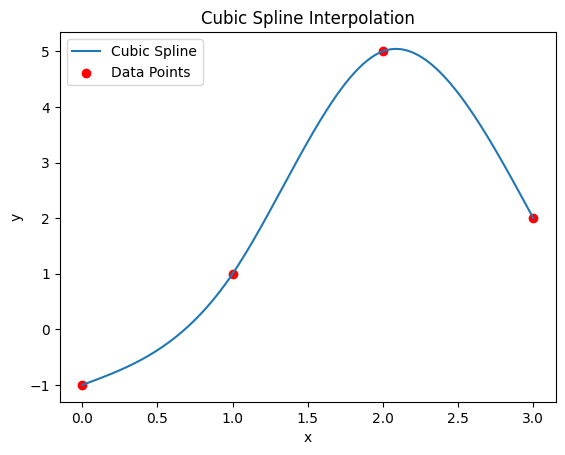

In [5]:
import numpy as np

xs = [0, 1, 2, 3]
ys = [-1, 1, 5, 2]

splines = cubic_spline(xs=xs, ys=ys)
_ = [display(s) for s in splines]
print("______")
_ = [display(s.expand()) for s in splines]

import matplotlib.pyplot as plt

x_vals = np.linspace(min(xs), max(xs), 200)
y_vals = np.zeros_like(x_vals)

for i, S in enumerate(splines):
    # Each spline is valid in [xs[i], xs[i+1]]
    mask = (x_vals >= xs[i]) & (x_vals <= xs[i+1])
    y_vals[mask] = [float(S.subs('x', x)) for x in x_vals[mask]]

plt.plot(x_vals, y_vals, label='Cubic Spline')
plt.scatter(xs, ys, color='red', label='Data Points')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic Spline Interpolation')
plt.show()


## **Para cada uno de los ejercicios anteriores, resuelva los splines cúbicos de frontera condicionada con $B_0=1$ para todos los valores de $B_1∈R$.**

### **Frntera Condicionada**

In [6]:
import sympy as sym
from IPython.display import display


# ###################################################################
def cubic_spline_clamped(
    xs: list[float], ys: list[float], B0: float, B1: float
) -> list[sym.Symbol]:
    """
    Cubic spline interpolation ``S``. Every two points are interpolated by a cubic polynomial
    ``S_j`` of the form ``S_j(x) = a_j + b_j(x - x_j) + c_j(x - x_j)^2 + d_j(x - x_j)^3.``

    xs must be different  but not necessarily ordered nor equally spaced.

    ## Parameters
    - xs, ys: points to be interpolated
    - B0, B1: derivatives at the first and last points

    ## Return
    - List of symbolic expressions for the cubic spline interpolation.
    """

    points = sorted(zip(xs, ys), key=lambda x: x[0])  # sort points by x
    xs = [x for x, _ in points]
    ys = [y for _, y in points]
    n = len(points) - 1  # number of splines
    h = [xs[i + 1] - xs[i] for i in range(n)]  # distances between  contiguous xs

    alpha = [0] * (n + 1)  # prealloc
    alpha[0] = 3 / h[0] * (ys[1] - ys[0]) - 3 * B0
    alpha[-1] = 3 * B1 - 3 / h[n - 1] * (ys[n] - ys[n - 1])

    for i in range(1, n):
        alpha[i] = 3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1])

    l = [2 * h[0]]
    u = [0.5]
    z = [alpha[0] / l[0]]

    for i in range(1, n):
        l += [2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1]]
        u += [h[i] / l[i]]
        z += [(alpha[i] - h[i - 1] * z[i - 1]) / l[i]]

    l.append(h[n - 1] * (2 - u[n - 1]))
    z.append((alpha[n] - h[n - 1] * z[n - 1]) / l[n])
    c = [0] * (n + 1)  # prealloc
    c[-1] = z[-1]

    x = sym.Symbol("x")
    splines = []
    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b = (ys[j + 1] - ys[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d = (c[j + 1] - c[j]) / (3 * h[j])
        a = ys[j]
        print(j, a, b, c[j], d)
        S = a + b * (x - xs[j]) + c[j] * (x - xs[j]) ** 2 + d * (x - xs[j]) ** 3

        splines.append(S)
    splines.reverse()
    return splines

1. $$(0, 1), (1, 5), (2, 3)$$

1 5 3.75 -3.500000000000001 -2.249999999999999
0 1 1.0 6.25 -3.25
1 5 3.6479591836734686 -3.704081632653062 -1.9438775510204076
0 1 1.0 6.3520408163265305 -3.352040816326531
1 5 3.545918367346939 -3.9081632653061225 -1.637755102040817
0 1 1.0 6.454081632653061 -3.454081632653061
1 5 3.4438775510204076 -4.112244897959185 -1.331632653061223
0 1 1.0 6.556122448979592 -3.556122448979592
1 5 3.341836734693878 -4.316326530612246 -1.025510204081632
0 1 1.0 6.658163265306123 -3.6581632653061233
1 5 3.2397959183673466 -4.520408163265307 -0.7193877551020403
0 1 1.0 6.760204081632653 -3.760204081632653
1 5 3.137755102040817 -4.724489795918368 -0.4132653061224489
0 1 1.0 6.862244897959184 -3.8622448979591844
1 5 3.0357142857142856 -4.92857142857143 -0.10714285714285617
0 1 1.0 6.964285714285715 -3.9642857142857153
1 5 2.933673469387755 -5.132653061224491 0.19897959183673533
0 1 1.0 7.066326530612246 -4.066326530612245
1 5 2.8316326530612246 -5.336734693877551 0.5051020408163264
0 1 1.0 7.168367346

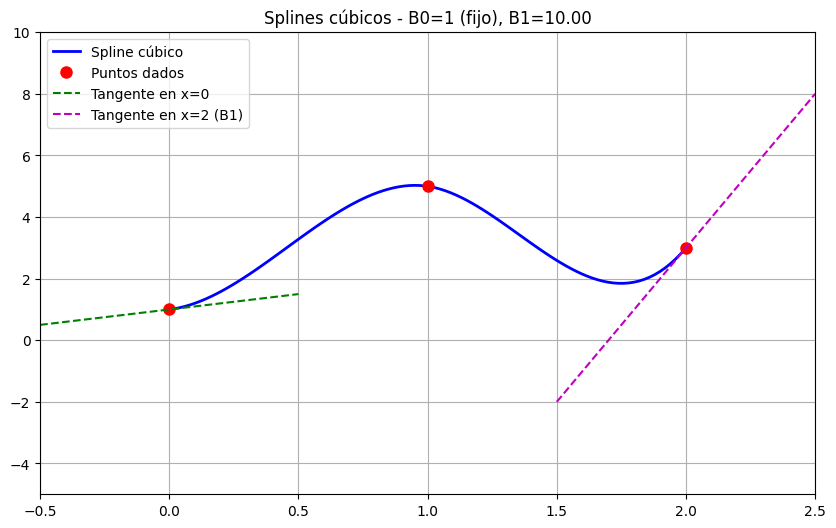

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import sympy as sym

# Configuración para el primer conjunto de puntos (0,1), (1,5), (2,3)
xs_points = [0, 1, 2]
ys_points = [1, 5, 3]
B0 = 1  # Derivada fija en el primer punto
B1_values = np.linspace(-10, 10, 50)  # Rango de valores para B1

# Crear la figura
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(-0.5, 2.5)
ax.set_ylim(-5, 10)
ax.grid(True)
ax.set_title('Splines cúbicos con tangentes en extremos')
line, = ax.plot([], [], 'b-', lw=2, label='Spline cúbico')
points = ax.plot(xs_points, ys_points, 'ro', ms=8, label='Puntos dados')

# Líneas tangentes
tangent0, = ax.plot([], [], 'g--', lw=1.5, label='Tangente en x=0')
tangent1, = ax.plot([], [], 'm--', lw=1.5, label=f'Tangente en x=2 (B1)')
ax.legend()

# Función para evaluar los splines
def evaluate_splines(splines, xs_points, x_range):
    y = []
    for x in x_range:
        for i in range(len(splines)):
            if x >= xs_points[i] and (i == len(splines)-1 or x <= xs_points[i+1]):
                y.append(float(splines[i].subs('x', x)))
                break
    return y

# Función para calcular la tangente en un punto
def get_tangent_line(x0, y0, slope, x_range, length=0.5):
    x_tangent = np.linspace(x0 - length, x0 + length, 2)
    y_tangent = y0 + slope * (x_tangent - x0)
    return x_tangent, y_tangent

# Función de inicialización
def init():
    line.set_data([], [])
    tangent0.set_data([], [])
    tangent1.set_data([], [])
    return line, tangent0, tangent1

# Función de animación
def animate(i):
    B1 = B1_values[i]
    
    # Calcular splines
    splines = cubic_spline_clamped(xs_points, ys_points, B0, B1)
    x_range = np.linspace(0, 2, 100)
    y_values = evaluate_splines(splines, xs_points, x_range)
    line.set_data(x_range, y_values)
    
    # Calcular y dibujar tangentes
    # Tangente en x=0 (usando B0)
    x_t0, y_t0 = get_tangent_line(xs_points[0], ys_points[0], B0, x_range)
    tangent0.set_data(x_t0, y_t0)
    
    # Tangente en x=2 (usando B1 actual)
    x_t1, y_t1 = get_tangent_line(xs_points[-1], ys_points[-1], B1, x_range)
    tangent1.set_data(x_t1, y_t1)
    
    ax.set_title(f'Splines cúbicos - B0={B0} (fijo), B1={B1:.2f}')
    return line, tangent0, tangent1

# Crear la animación
ani = FuncAnimation(fig, animate, frames=len(B1_values),
                    init_func=init, blit=True, interval=200)

# Mostrar la animación
HTML(ani.to_jshtml())

2. $$(0, -5), (1, -4), (2, 3)$$

1 -4 8.25 14.5 -15.75
0 -5 1.0 -7.25 7.25
1 -4 8.14795918367347 14.295918367346939 -15.443877551020407
0 -5 1.0 -7.1479591836734695 7.147959183673469
1 -4 8.045918367346939 14.091836734693878 -15.137755102040819
0 -5 1.0 -7.045918367346939 7.045918367346939
1 -4 7.943877551020407 13.887755102040817 -14.831632653061225
0 -5 1.0 -6.9438775510204085 6.943877551020409
1 -4 7.841836734693877 13.683673469387756 -14.525510204081632
0 -5 1.0 -6.841836734693878 6.841836734693878
1 -4 7.739795918367346 13.479591836734695 -14.21938775510204
0 -5 1.0 -6.7397959183673475 6.739795918367347
1 -4 7.637755102040816 13.275510204081634 -13.91326530612245
0 -5 1.0 -6.637755102040817 6.637755102040817
1 -4 7.535714285714286 13.071428571428571 -13.607142857142856
0 -5 1.0 -6.535714285714286 6.535714285714286
1 -4 7.433673469387755 12.86734693877551 -13.301020408163266
0 -5 1.0 -6.433673469387755 6.433673469387755
1 -4 7.331632653061225 12.66326530612245 -12.994897959183675
0 -5 1.0 -6.331632653061225 6.3316

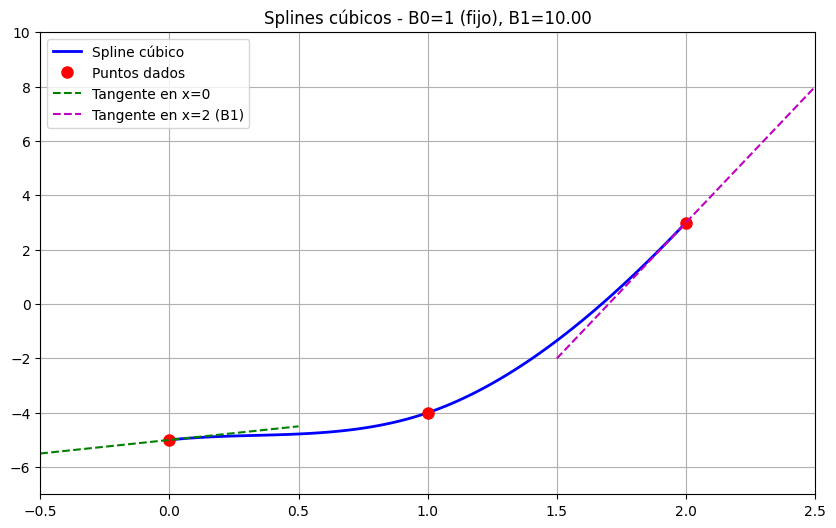

In [9]:
# Configuración para el primer conjunto de puntos (0,1), (1,5), (2,3)
xs_points = [0, 1, 2]
ys_points = [-5, -4, 3]
B0 = 1  # Derivada fija en el primer punto
B1_values = np.linspace(-10, 10, 50)  # Rango de valores para B1

# Crear la figura
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(-0.5, 2.5)
ax.set_ylim(-7, 10)
ax.grid(True)
ax.set_title('Splines cúbicos con tangentes en extremos')
line, = ax.plot([], [], 'b-', lw=2, label='Spline cúbico')
points = ax.plot(xs_points, ys_points, 'ro', ms=8, label='Puntos dados')

# Líneas tangentes
tangent0, = ax.plot([], [], 'g--', lw=1.5, label='Tangente en x=0')
tangent1, = ax.plot([], [], 'm--', lw=1.5, label=f'Tangente en x=2 (B1)')
ax.legend()

# Función para evaluar los splines
def evaluate_splines(splines, xs_points, x_range):
    y = []
    for x in x_range:
        for i in range(len(splines)):
            if x >= xs_points[i] and (i == len(splines)-1 or x <= xs_points[i+1]):
                y.append(float(splines[i].subs('x', x)))
                break
    return y

# Función para calcular la tangente en un punto
def get_tangent_line(x0, y0, slope, x_range, length=0.5):
    x_tangent = np.linspace(x0 - length, x0 + length, 2)
    y_tangent = y0 + slope * (x_tangent - x0)
    return x_tangent, y_tangent

# Función de inicialización
def init():
    line.set_data([], [])
    tangent0.set_data([], [])
    tangent1.set_data([], [])
    return line, tangent0, tangent1

# Función de animación
def animate(i):
    B1 = B1_values[i]
    
    # Calcular splines
    splines = cubic_spline_clamped(xs_points, ys_points, B0, B1)
    x_range = np.linspace(0, 2, 100)
    y_values = evaluate_splines(splines, xs_points, x_range)
    line.set_data(x_range, y_values)
    
    # Calcular y dibujar tangentes
    # Tangente en x=0 (usando B0)
    x_t0, y_t0 = get_tangent_line(xs_points[0], ys_points[0], B0, x_range)
    tangent0.set_data(x_t0, y_t0)
    
    # Tangente en x=2 (usando B1 actual)
    x_t1, y_t1 = get_tangent_line(xs_points[-1], ys_points[-1], B1, x_range)
    tangent1.set_data(x_t1, y_t1)
    
    ax.set_title(f'Splines cúbicos - B0={B0} (fijo), B1={B1:.2f}')
    return line, tangent0, tangent1

# Crear la animación
ani2 = FuncAnimation(fig, animate, frames=len(B1_values),
                    init_func=init, blit=True, interval=200)

# Mostrar la animación
HTML(ani2.to_jshtml())

3. $$(0, -1), (1, 1), (2, 5), (3, 2)$$


2 5 2.333333333333333 -3.666666666666666 -1.6666666666666667
1 1 3.6666666666666665 2.333333333333333 -1.9999999999999998
0 -1 1.0 0.3333333333333335 0.6666666666666665
2 5 2.224489795918367 -3.8571428571428563 -1.3673469387755108
1 1 3.693877551020408 2.387755102040816 -2.081632653061224
0 -1 1.0 0.30612244897959195 0.693877551020408
2 5 2.115646258503401 -4.047619047619047 -1.0680272108843545
1 1 3.7210884353741496 2.442176870748299 -2.1632653061224487
0 -1 1.0 0.2789115646258504 0.7210884353741496
2 5 2.0068027210884347 -4.238095238095238 -0.7687074829931966
1 1 3.748299319727891 2.496598639455782 -2.2448979591836733
0 -1 1.0 0.2517006802721089 0.7482993197278911
2 5 1.8979591836734686 -4.428571428571428 -0.46938775510204067
1 1 3.7755102040816326 2.5510204081632653 -2.326530612244898
0 -1 1.0 0.22448979591836737 0.7755102040816326
2 5 1.7891156462585025 -4.619047619047619 -0.17006802721088418
1 1 3.802721088435374 2.6054421768707483 -2.4081632653061225
0 -1 1.0 0.19727891156462585 

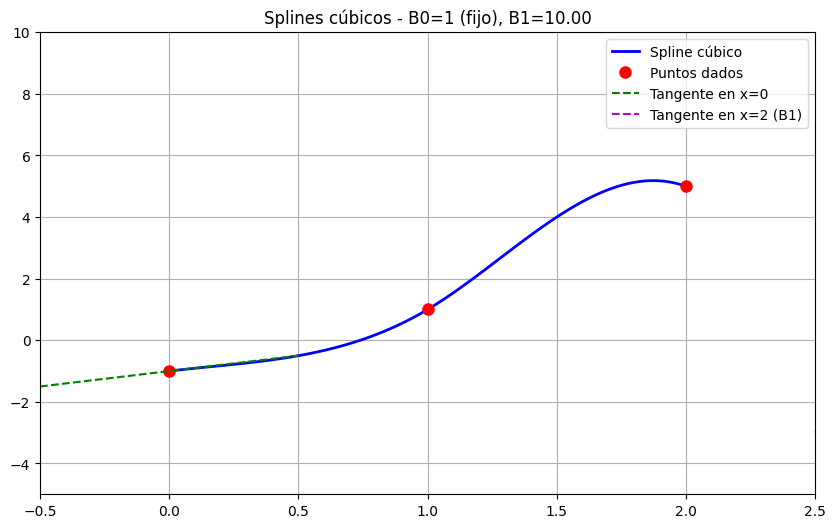

In [8]:
# Configuración para el primer conjunto de puntos 
xs_points = [0, 1, 2, 3]
ys_points = [-1, 1, 5, 2]
B0 = 1  # Derivada fija en el primer punto
B1_values = np.linspace(-10, 10, 50)  # Rango de valores para B1

# Crear la figura
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(-0.5, 2.5)
ax.set_ylim(-5, 10)
ax.grid(True)
ax.set_title('Splines cúbicos con tangentes en extremos')
line, = ax.plot([], [], 'b-', lw=2, label='Spline cúbico')
points = ax.plot(xs_points, ys_points, 'ro', ms=8, label='Puntos dados')

# Líneas tangentes
tangent0, = ax.plot([], [], 'g--', lw=1.5, label='Tangente en x=0')
tangent1, = ax.plot([], [], 'm--', lw=1.5, label=f'Tangente en x=2 (B1)')
ax.legend()

# Función para evaluar los splines
def evaluate_splines(splines, xs_points, x_range):
    y = []
    for x in x_range:
        for i in range(len(splines)):
            if x >= xs_points[i] and (i == len(splines)-1 or x <= xs_points[i+1]):
                y.append(float(splines[i].subs('x', x)))
                break
    return y

# Función para calcular la tangente en un punto
def get_tangent_line(x0, y0, slope, x_range, length=0.5):
    x_tangent = np.linspace(x0 - length, x0 + length, 2)
    y_tangent = y0 + slope * (x_tangent - x0)
    return x_tangent, y_tangent

# Función de inicialización
def init():
    line.set_data([], [])
    tangent0.set_data([], [])
    tangent1.set_data([], [])
    return line, tangent0, tangent1

# Función de animación
def animate(i):
    B1 = B1_values[i]
    
    # Calcular splines
    splines = cubic_spline_clamped(xs_points, ys_points, B0, B1)
    x_range = np.linspace(0, 2, 100)
    y_values = evaluate_splines(splines, xs_points, x_range)
    line.set_data(x_range, y_values)
    
    # Calcular y dibujar tangentes
    # Tangente en x=0 (usando B0)
    x_t0, y_t0 = get_tangent_line(xs_points[0], ys_points[0], B0, x_range)
    tangent0.set_data(x_t0, y_t0)
    
    # Tangente en x=2 (usando B1 actual)
    x_t1, y_t1 = get_tangent_line(xs_points[-1], ys_points[-1], B1, x_range)
    tangent1.set_data(x_t1, y_t1)
    
    ax.set_title(f'Splines cúbicos - B0={B0} (fijo), B1={B1:.2f}')
    return line, tangent0, tangent1

# Crear la animación
ani3 = FuncAnimation(fig, animate, frames=len(B1_values),
                    init_func=init, blit=True, interval=200)

# Mostrar la animación
HTML(ani3.to_jshtml())